In [2]:
import tensorflow as tf
import os

In [23]:
def read_img(filelist):
    #构建文件队列
    file_queue = tf.train.string_input_producer(filelist)

    #构建文件读取器
    reader = tf.WholeFileReader()

    #读取数据
    name, val = reader.read(file_queue)

    #解码
    img = tf.image.decode_jpeg(val)

    #批处理
    img_resiezed = tf.image.resize(img, [200, 200])  #修改图像大小
    img_resiezed.set_shape([200, 200, 3])  #修改张量大小
    img_bat = tf.train.batch([img_resiezed], batch_size=10, num_threads=1)

    return img_bat

In [24]:
#构建文件列表
dir_name = './test_img/'
file_names = os.listdir(dir_name)
file_list = []
for f in file_names:
    file_list.append(os.path.join(dir_name, f))

In [25]:
imgs = read_img(file_list)

In [26]:
with tf.Session() as sess:
    #线程协调器
    coord = tf.train.Coordinator()
    #开启读取文件线程
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)  #线程协调器

    print(sess.run(imgs))
    res=sess.run(imgs)

    imgs = imgs.eval()

    #等待线程停止，回收资源
    coord.request_stop()
    coord.join(threads)  #回收

[[[[253.      253.      255.     ]
   [252.4     252.4     254.4    ]
   [251.8     251.8     253.8    ]
   ...
   [250.79999 251.79999 253.79999]
   [250.      251.      253.     ]
   [252.79999 253.79999 255.     ]]

  [[253.      253.      255.     ]
   [252.4     252.4     254.4    ]
   [251.      251.      253.     ]
   ...
   [249.98    250.98    252.98   ]
   [249.98    250.98    252.98   ]
   [251.77998 252.77998 254.388  ]]

  [[253.      253.      255.     ]
   [252.38399 252.38399 254.38399]
   [251.      251.      253.     ]
   ...
   [248.96    249.96    251.96   ]
   [248.96    249.96    251.96   ]
   [250.76    251.76    253.76   ]]

  ...

  [[253.      252.94    255.     ]
   [249.14    249.08    251.26   ]
   [247.14    246.692   249.06   ]
   ...
   [254.      254.      254.     ]
   [254.      254.      254.     ]
   [254.      254.      254.     ]]

  [[253.95999 253.95999 255.     ]
   [249.776   249.776   251.776  ]
   [248.35199 247.952   250.152  ]
   ...
   [2

In [27]:
import matplotlib.pyplot as plt

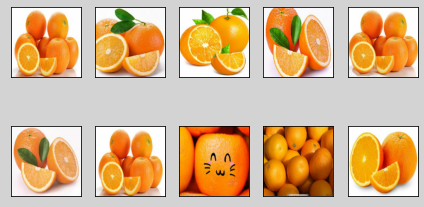

In [28]:
fig = plt.figure('Imshow', facecolor='lightgray')
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(res[i].astype("int32")) #没有imgs = imgs.eval()，imgs是tensor类型，就会报错
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()  #紧凑式布局
plt.show()

In [30]:
type(res)

numpy.ndarray